<a href="https://colab.research.google.com/github/JOyongho4/DARTB4/blob/main/KoreanHealthRecords_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

Korean Health Record엔 우리나라의 건강검진 데이터가 수록되어 있다. 그중 당뇨와 다른 칼럼 간의 관계를 파악하고, 이로 인해 개인 데이터를 통해 당뇨를 파악할 수 있게끔 학습을 실시한다.

```
결측치 처리
  모든 칼럼들을 카테고리화 해서 결측치를 처리하였다.
```
```
스케일링
  minmax 스케일링을 사용했다.
```
```
인코딩
  원-핫 인코딩을 사용했다.
```


In [ ]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings

In [ ]:
R1=pd.read_csv('https://raw.githubusercontent.com/JOyongho4/DARTB4/main/KoreanHealthRecords/follow_01_data.csv')
R2=pd.read_csv('https://raw.githubusercontent.com/JOyongho4/DARTB4/main/KoreanHealthRecords/follow_02_data.csv')
R3=pd.read_csv('https://raw.githubusercontent.com/JOyongho4/DARTB4/main/KoreanHealthRecords/follow_03_data.csv')
R4=pd.read_csv('https://raw.githubusercontent.com/JOyongho4/DARTB4/main/KoreanHealthRecords/follow_04_data.csv')
R5=pd.read_csv('https://raw.githubusercontent.com/JOyongho4/DARTB4/main/KoreanHealthRecords/follow_05_data.csv')

In [ ]:
R1.head(3)

,T00_ID,T00_DATA_CLASS,T01_EDATE,T00_SEX,T01_AGE,T01_EDU,T01_MARRY,T01_DRINK,T01_DRDU,T01_TAKFQ,...,T01_DBP,T01_HBA1C,T01_GLU0,T01_CREATININE,T01_AST,T01_ALT,T01_TCHL,T01_HDL,T01_TG,T01_INS0
0,K_FOLLOW_0001,F05,200412,1,56,1,2,3,4,0,...,80,5.6,82,0.7,30,38,154,35,126,6.7
1,K_FOLLOW_0002,F19,200401,1,40,3,2,3,4,0,...,118,5.5,130,1.1,46,75,214,44,169,4.3
2,K_FOLLOW_0003,F05,200309,1,52,2,2,2,3,0,...,90,5.2,83,0.9,29,45,130,27,134,7.9


In [ ]:
# 행열 개수 확인
print(R1.shape)

(1000, 64)


In [ ]:
# 66666,99999는 결측치와 같음. 이 둘은 null값으로 변환, 77777은 0과 같음. 이는 0으로 변환
R1.replace(66666,np.nan,inplace=True)
R1.replace(99999,np.nan,inplace=True)
R1.replace(77777,0,inplace=True)
R1.head(10)

,T00_ID,T00_DATA_CLASS,T01_EDATE,T00_SEX,T01_AGE,T01_EDU,T01_MARRY,T01_DRINK,T01_DRDU,T01_TAKFQ,...,T01_DBP,T01_HBA1C,T01_GLU0,T01_CREATININE,T01_AST,T01_ALT,T01_TCHL,T01_HDL,T01_TG,T01_INS0
0,K_FOLLOW_0001,F05,200412,1,56,1.0,2.0,3.0,4.0,0.0,...,80,5.6,82.0,0.7,30,38,154,35,126.0,6.7
1,K_FOLLOW_0002,F19,200401,1,40,3.0,2.0,3.0,4.0,0.0,...,118,5.5,130.0,1.1,46,75,214,44,169.0,4.3
2,K_FOLLOW_0003,F05,200309,1,52,2.0,2.0,2.0,3.0,0.0,...,90,5.2,83.0,0.9,29,45,130,27,134.0,7.9
3,K_FOLLOW_0004,F05,200504,2,60,2.0,2.0,1.0,0.0,0.0,...,90,5.6,89.0,0.6,35,34,182,47,123.0,12.6
4,K_FOLLOW_0005,F19,200402,1,49,3.0,2.0,3.0,4.0,0.0,...,79,6.9,95.0,1.0,52,33,203,36,277.0,2.7
5,K_FOLLOW_0006,F18,200401,1,50,3.0,2.0,3.0,4.0,2.0,...,96,NaN,93.0,1.1,25,24,215,47,159.0,8.6
6,K_FOLLOW_0007,F05,200410,2,48,3.0,2.0,3.0,1.0,0.0,...,67,5.1,95.0,0.8,30,20,229,66,64.0,5.4
7,K_FOLLOW_0008,F16,200308,2,48,3.0,2.0,1.0,0.0,0.0,...,55,NaN,270.0,0.9,21,18,161,55,75.0,NaN
8,K_FOLLOW_0009,F18,200301,1,42,5.0,2.0,3.0,4.0,1.0,...,92,NaN,96.0,0.9,18,14,165,53,199.0,8.1
9,K_FOLLOW_0010,F01,200312,2,62,1.0,3.0,1.0,0.0,0.0,...,90,NaN,81.0,0.9,25,23,247,59,184.0,9.6


In [ ]:
# 1차적으로 의미없는 개인식별 번호, 설문날짜, 진단나이 제거
R1_1=R1.drop(columns=['T00_ID','T00_DATA_CLASS','T01_EDATE','T01_MARRY','T01_DMAG'])

In [ ]:
# 'T01_' 전부 제거
R1_1.columns = R1_1.columns.str.replace('T01_', '', regex=False)
R1_1['SEX']=R1_1['T00_SEX']

# 결측치 처리

# 칼럼이 너무 많아 유사한 것들끼리 묶었음
R1_DRINK, SMOKE, HTN, LIP, FAM, BODY


In [ ]:
# 술과 관련된 칼럼들만 모았음
R1_DRINK=R1_1[['DRINK','TAKFQ','TAKAM','RICEFQ','RICEAM','WINEFQ','WINEAM','SOJUFQ','SOJUAM','BEERFQ','BEERAM','HLIQFQ','HLIQAM']]

# 흡연과 관련된 칼럼만 모았음
R1_SMOKE=R1_1[['SMOKE','SMDU','PSM']]

# 고혈압과 관련된 칼럼만 모았음
R1_HTN=R1_1[['HTN','HTNAG']]

# 고지혈증과 관련된 칼럼만 모았음
R1_LIP=R1_1[['LIP','LIPAG']]

# 가족력과 관련된 칼럼만 모았음
R1_FAM=R1_1[['FMFHT','FMFHTAG','FMMHT','FMMHTAG','FMFDM','FMFDMAG','FMMDM','FMMDMAG']]

# 신체정보와 관련된 칼럼만 모았음
R1_BODY=R1_1[['SEX','PMYN_C','PMAG_C','HEIGHT','WEIGHT','WAIST','PULSE','HIP','SBP','DBP','HBA1C','GLU0','CREATININE','AST','ALT','TCHL','HDL','TG','INS0']]

# 술관련 으로만

결측치 처리

In [ ]:
# 결측치 확인
print(R1_DRINK.isnull().sum())

DRINK      7
TAKFQ     13
TAKAM     13
RICEFQ    12
RICEAM    15
WINEFQ    13
WINEAM    15
SOJUFQ    17
SOJUAM    18
BEERFQ    12
BEERAM    14
HLIQFQ    12
HLIQAM    13
dtype: int64


In [ ]:
R1_DRINK['DRINK'].value_counts()

,count
DRINK,
1.0,487
3.0,463
2.0,43


In [ ]:
# 음주빈도가 모두 0이면 DRINK 결측치:1, 그렇지 않으면 DRINK 결측치:3으로 처리함
# 음주 빈도 칼럼들의 합계를 계산
drink_sum = (R1_DRINK['TAKFQ'].fillna(0) + R1_DRINK['RICEFQ'].fillna(0) +
             R1_DRINK['WINEFQ'].fillna(0) + R1_DRINK['SOJUFQ'].fillna(0) +
             R1_DRINK['BEERFQ'].fillna(0) + R1_DRINK['HLIQFQ'].fillna(0))

# 조건에 따라 DRINK 칼럼의 결측치 채우기
R1_DRINK['DRINK'] = np.where(drink_sum == 0,
                               R1_DRINK['DRINK'].fillna(1),  # 음주 빈도가 모두 0일 경우 결측치에 1 채움
                               R1_DRINK['DRINK'].fillna(3))  # 음주 빈도가 0이 아닐 경우 결측치에 3 채움
R1_DRINK['DRINK'].value_counts()

<ipython-input-1545-b4b11f4b42fe>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count
DRINK,
1.0,494
3.0,463
2.0,43


In [ ]:
# TAKFQ는 0이 압도적으로 많기에 결측치 0으로 처리
R1_DRINK['TAKFQ']=R1_DRINK['TAKFQ'].fillna(0)
R1_DRINK['TAKFQ'].value_counts()

# TAKFG가 0이면 TAKAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_takam_excluding_zeros = R1_DRINK[R1_DRINK['TAKAM'] != 0]['TAKAM'].mean()
R1_DRINK.loc[R1_DRINK['TAKFQ'] == 0, 'TAKAM'] = 0
R1_DRINK['TAKAM'].fillna(round(mean_takam_excluding_zeros,1), inplace=True)
round(mean_takam_excluding_zeros,1)

<ipython-input-1546-691043badd00>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1546-691043badd00>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2.4

In [ ]:
# 0으로 RICEFQ 결측치 처리
R1_DRINK['RICEFQ']=R1_DRINK['RICEFQ'].fillna(0)

# RICEFG가 0이면 RICEAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_riceam_excluding_zeros = R1_DRINK[R1_DRINK['RICEAM'] != 0]['RICEAM'].mean()
R1_DRINK.loc[R1_DRINK['RICEFQ'] == 0, 'RICEAM'] = 0
R1_DRINK['RICEAM'].fillna(round(mean_riceam_excluding_zeros,1), inplace=True)
round(mean_riceam_excluding_zeros,1)

<ipython-input-1547-fd517e677f8a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1547-fd517e677f8a>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3.6

In [ ]:
# 0으로 WINEFQ 결측치 처리
R1_DRINK['WINEFQ']=R1_DRINK['WINEFQ'].fillna(0)
R1_DRINK['WINEFQ'].value_counts()

# WINEFG가 0이면 WINEAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_wineam_excluding_zeros = R1_DRINK[R1_DRINK['WINEAM'] != 0]['WINEAM'].mean()
R1_DRINK.loc[R1_DRINK['WINEFQ'] == 0, 'WINEAM'] = 0
R1_DRINK['WINEAM'].fillna(round(mean_wineam_excluding_zeros,1), inplace=True)
round(mean_wineam_excluding_zeros,1)

<ipython-input-1548-b5eda4aea550>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1548-b5eda4aea550>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1.8

In [ ]:
# 0으로 SOJUFQ 결측치 처리
R1_DRINK['SOJUFQ']=R1_DRINK['SOJUFQ'].fillna(0)

# SOJUFG가 0이면 SOJUAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_sojuam_excluding_zeros = R1_DRINK[R1_DRINK['SOJUAM'] != 0]['SOJUAM'].mean()
R1_DRINK.loc[R1_DRINK['SOJUFQ'] == 0, 'SOJUAM'] = 0
R1_DRINK['SOJUAM'].fillna(round(mean_sojuam_excluding_zeros,1), inplace=True)
round(mean_sojuam_excluding_zeros,1)

<ipython-input-1549-9dcaa09a1c3f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1549-9dcaa09a1c3f>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5.8

In [ ]:
# 0으로 BEERFQ 결측치 처리
R1_DRINK['BEERFQ']=R1_DRINK['BEERFQ'].fillna(0)

# BEERFG가 0이면 BEERAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_beeram_excluding_zeros = R1_DRINK[R1_DRINK['BEERAM'] != 0]['BEERAM'].mean()
R1_DRINK.loc[R1_DRINK['BEERFQ'] == 0, 'BEERAM'] = 0
R1_DRINK['BEERAM'].fillna(round(mean_beeram_excluding_zeros,1), inplace=True)
round(mean_beeram_excluding_zeros,1)

<ipython-input-1550-6b7af836514d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1550-6b7af836514d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4.0

In [ ]:
# 0으로 HLIQFQ 결측치 처리
R1_DRINK['HLIQFQ']=R1_DRINK['HLIQFQ'].fillna(0)

# HLIQFG가 0이면 HLIQAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_hliqam_excluding_zeros = R1_DRINK[R1_DRINK['HLIQAM'] != 0]['HLIQAM'].mean()
R1_DRINK.loc[R1_DRINK['HLIQFQ'] == 0, 'HLIQAM'] = 0
R1_DRINK['HLIQAM'].fillna(round(mean_hliqam_excluding_zeros,1), inplace=True)
round(mean_hliqam_excluding_zeros,1)

<ipython-input-1551-0922257445e7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1551-0922257445e7>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



6.4

이상치 확인

FQ가 0인데 AM이 0이 아닌 값들 존재 확인

In [ ]:
R1_DRINK[(R1_DRINK['TAKFQ'] == 0) & (R1_DRINK['TAKAM'] != 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


In [ ]:
R1_DRINK[(R1_DRINK['RICEFQ'] != 0) & (R1_DRINK['RICEAM'] == 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


In [ ]:
R1_DRINK[(R1_DRINK['WINEFQ'] != 0) & (R1_DRINK['WINEAM'] == 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


In [ ]:
R1_DRINK[(R1_DRINK['SOJUFQ'] != 0) & (R1_DRINK['SOJUAM'] == 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


In [ ]:
R1_DRINK[(R1_DRINK['BEERFQ'] != 0) & (R1_DRINK['BEERAM'] == 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


In [ ]:
R1_DRINK[(R1_DRINK['HLIQFQ'] != 0) & (R1_DRINK['HLIQAM'] == 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


FQ * AM 으로 범주형 변수 연속형으로 변환

In [ ]:
# 빈도 범주가 일정하지 않음. 모든 값을 월 횟수로 변환

for column in ['TAKFQ','RICEFQ','WINEFQ','SOJUFQ','BEERFQ','HLIQFQ']:
    R1_DRINK[column] = R1_DRINK[column].replace(2.0, 2.5)
    R1_DRINK[column] = R1_DRINK[column].replace(3.0, 4)
    R1_DRINK[column] = R1_DRINK[column].replace(4.0, 10)
    R1_DRINK[column] = R1_DRINK[column].replace(5.0, 20)
    R1_DRINK[column] = R1_DRINK[column].replace(6.0, 30)

<ipython-input-1558-0e33bfafb3c4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1558-0e33bfafb3c4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1558-0e33bfafb3c4>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1558

In [ ]:
# FQ*AM 칼럼 생성

R1_DRINK['TAK'] = R1_DRINK['TAKFQ'] * R1_DRINK['TAKAM']
R1_DRINK['RICE'] = R1_DRINK['RICEFQ'] * R1_DRINK['RICEAM']
R1_DRINK['WINE'] = R1_DRINK['WINEFQ'] * R1_DRINK['WINEAM']
R1_DRINK['SOJU'] = R1_DRINK['SOJUFQ'] * R1_DRINK['SOJUAM']
R1_DRINK['BEER'] = R1_DRINK['BEERFQ'] * R1_DRINK['BEERAM']
R1_DRINK['HLIQ'] = R1_DRINK['HLIQFQ'] * R1_DRINK['HLIQAM']
R1_DRINK=R1_DRINK[['TAK','TAKFQ','RICE','RICEFQ','WINE','WINEFQ','SOJU','SOJUFQ','BEER','BEERFQ','HLIQ','HLIQFQ']]

<ipython-input-1559-3180f6815d11>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1559-3180f6815d11>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1559-3180f6815d11>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1559

# 흡연 관련으로만

In [ ]:
# 결측치 확인
print(R1_SMOKE.isnull().sum())

SMOKE     9
SMDU     38
PSM      57
dtype: int64


In [ ]:
# SMOKE는 1이 압도적으로 많기에 결측치 1으로 처리
R1_SMOKE['SMOKE']=R1_SMOKE['SMOKE'].fillna(1)

# SMOKE가 1이면 SMDU 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_SMDU_excluding_zeros = R1_SMOKE[R1_SMOKE['SMOKE'] != 1]['SMDU'].mean()
R1_SMOKE.loc[R1_SMOKE['SMOKE'] == 0, 'SMDU'] = 0
R1_SMOKE['SMDU'].fillna(round(mean_SMDU_excluding_zeros,1), inplace=True)
round(mean_SMDU_excluding_zeros,1)

# PSM 1로 처리
R1_SMOKE['PSM']=R1_SMOKE['PSM'].fillna(1)

<ipython-input-1561-7c3ac5979194>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1561-7c3ac5979194>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1561-7c3ac5979194>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 고혈압 관련으로만

In [ ]:
# 결측치 확인
print(R1_HTN.isnull().sum())

HTN      0
HTNAG    3
dtype: int64


In [ ]:
# HTN이 1이면 HTNAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_htnag_excluding_zeros = R1_HTN[R1_HTN['HTN'] != 1]['HTNAG'].mean()
R1_HTN.loc[R1_HTN['HTN'] == 0, 'HTNAG'] = 0
R1_HTN['HTNAG'].fillna(round(mean_htnag_excluding_zeros,1), inplace=True)
round(mean_htnag_excluding_zeros,1)

<ipython-input-1563-cbf0a542d74f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



52.8

# 고지혈증 관련으로만

In [ ]:
# 결측치 확인
print(R1_LIP.isnull().sum())

LIP      0
LIPAG    2
dtype: int64


In [ ]:
# LIP이 1이면 LIPAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_lip_excluding_zeros = R1_LIP[R1_LIP['LIP'] != 1]['LIPAG'].mean()
R1_LIP.loc[R1_LIP['LIP'] == 0, 'LIPAG'] = 0
R1_LIP['LIPAG'].fillna(round(mean_lip_excluding_zeros,1), inplace=True)
round(mean_lip_excluding_zeros,1)

<ipython-input-1565-15d0b638d0f6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



52.4

# 가족력으로만

In [ ]:
# 결측치 확인
print(R1_FAM.isnull().sum())

FMFHT       0
FMFHTAG    18
FMMHT       0
FMMHTAG    25
FMFDM       0
FMFDMAG     7
FMMDM       0
FMMDMAG    13
dtype: int64


In [ ]:
# FMFHT가 1이면 FMFHTAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_fmfht_excluding_zeros = R1_FAM[R1_FAM['FMFHT'] != 1]['FMFHTAG'].mean()
R1_FAM.loc[R1_FAM['FMFHT'] == 0, 'FMFHTAG'] = 0
R1_FAM['FMFHTAG'].fillna(round(mean_fmfht_excluding_zeros,1), inplace=True)
round(mean_fmfht_excluding_zeros,1)

# FMMHT가 1이면 FMMHTAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_fmmht_excluding_zeros = R1_FAM[R1_FAM['FMMHT'] != 1]['FMMHTAG'].mean()
R1_FAM.loc[R1_FAM['FMMHT'] == 0, 'FMMHTAG'] = 0
R1_FAM['FMMHTAG'].fillna(round(mean_fmmht_excluding_zeros,1), inplace=True)
round(mean_fmmht_excluding_zeros,1)

# FMFDMd이 1이면 FMFDMAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_fmfdm_excluding_zeros = R1_FAM[R1_FAM['FMFDM'] != 1]['FMFDMAG'].mean()
R1_FAM.loc[R1_FAM['FMFDM'] == 0, 'FMFDMAG'] = 0
R1_FAM['FMFDMAG'].fillna(round(mean_fmfdm_excluding_zeros,1), inplace=True)
round(mean_fmfdm_excluding_zeros,1)

# FMMDM이 1이면 FMMDMAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_fmmdm_excluding_zeros = R1_FAM[R1_FAM['FMMDM'] != 1]['FMMDMAG'].mean()
R1_FAM.loc[R1_FAM['FMMDM'] == 0, 'FMMDMAG'] = 0
R1_FAM['FMMDMAG'].fillna(round(mean_fmmdm_excluding_zeros,1), inplace=True)
round(mean_fmmdm_excluding_zeros,1)

<ipython-input-1567-c5f3e9f1f74d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1567-c5f3e9f1f74d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1567-c5f3e9f1f74d>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1567-c5f3e9f1f74d>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

65.8

# 신체관련으로만

In [ ]:
# 결측치 확인
print(R1_BODY.isnull().sum())

SEX             0
PMYN_C          6
PMAG_C         37
HEIGHT          0
WEIGHT          0
WAIST           2
PULSE          44
HIP             3
SBP             0
DBP             0
HBA1C         318
GLU0           12
CREATININE      0
AST             0
ALT             0
TCHL            0
HDL             0
TG              1
INS0          196
dtype: int64


In [ ]:
# SEX가 1이면 PMYN_C 결측치 0, 1이 아니면 2로 처리
R1_BODY.loc[(R1_BODY['SEX'] == 1) & (R1_BODY['PMYN_C'].isnull()), 'PMYN_C'] = 0
R1_BODY.loc[(R1_BODY['SEX'] != 1) & (R1_BODY['PMYN_C'].isnull()), 'PMYN_C'] = 2
R1_BODY['PMYN_C'].value_counts()

# PMYN_C가 2가 아니면, PMAG_C 결측치 0, 2이면 0을 제외한 PMAG_C의 평균으로 처리
mean_pmag_excluding_zeros = R1_BODY[R1_BODY['PMYN_C'] == 2]['PMAG_C'].mean()
R1_BODY.loc[R1_BODY['PMYN_C'] != 2, 'PMAG_C'] = 0
R1_BODY['PMAG_C'].fillna(round(mean_pmag_excluding_zeros,1), inplace=True)
round(mean_pmag_excluding_zeros,1)

# 나머지 결측치는 전부 평균으로 처리
R1_BODY['WAIST'].fillna(round(R1_BODY['WAIST'].mean(),1), inplace=True)
R1_BODY['PULSE'].fillna(round(R1_BODY['PULSE'].mean(),1), inplace=True)
R1_BODY['HIP'].fillna(round(R1_BODY['HIP'].mean(),1), inplace=True)
R1_BODY['HBA1C'].fillna(round(R1_BODY['HBA1C'].mean(),1), inplace=True)
R1_BODY['GLU0'].fillna(round(R1_BODY['GLU0'].mean(),1), inplace=True)
R1_BODY['TG'].fillna(round(R1_BODY['TG'].mean(),1), inplace=True)
R1_BODY['INS0'].fillna(round(R1_BODY['INS0'].mean(),1), inplace=True)

<ipython-input-1569-faf2d340b164>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1569-faf2d340b164>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1569-faf2d340b164>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1569-faf2d340b164>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

# 카테고리별 테이블 전부 통합

In [ ]:
RECORD=pd.concat([R1_1['DM'],R1_DRINK,R1_SMOKE,R1_HTN,R1_LIP,R1_FAM,R1_BODY],axis=1)
RECORD.head()

,DM,TAK,TAKFQ,RICE,RICEFQ,WINE,WINEFQ,SOJU,SOJUFQ,BEER,...,DBP,HBA1C,GLU0,CREATININE,AST,ALT,TCHL,HDL,TG,INS0
0,1,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0,0.0,...,80,5.6,82.0,0.7,30,38,154,35,126.0,6.7
1,1,0.0,0.0,0.0,0.0,0.0,0.0,480.0,20.0,10.0,...,118,5.5,130.0,1.1,46,75,214,44,169.0,4.3
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90,5.2,83.0,0.9,29,45,130,27,134.0,7.9
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90,5.6,89.0,0.6,35,34,182,47,123.0,12.6
4,1,0.0,0.0,0.0,0.0,0.0,0.0,70.0,10.0,0.0,...,79,6.9,95.0,1.0,52,33,203,36,277.0,2.7


# 수치형 범주 minmax scaling?

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 훈련 데이터와 테스트 데이터를 스케일링
RECORD_scaled = RECORD.copy()

# 연속형 변수만 스케일링
RECORD_scaled[['TAK','RICE','SOJU','BEER','HLIQ','SMDU','PSM','HTNAG','LIPAG','FMFHTAG','FMMHTAG','FMFDMAG','FMMDMAG',
              'PMAG_C','HEIGHT','WEIGHT','WAIST','PULSE','HIP','SBP','DBP','HBA1C','GLU0','CREATININE',
              'AST','ALT','TCHL','HDL','TG','INS0']] = scaler.fit_transform(RECORD_scaled[['TAK',
              'RICE','SOJU','BEER','HLIQ','SMDU','PSM','HTNAG','LIPAG','FMFHTAG','FMMHTAG','FMFDMAG','FMMDMAG',
              'PMAG_C','HEIGHT','WEIGHT','WAIST','PULSE','HIP','SBP','DBP','HBA1C','GLU0','CREATININE',
              'AST','ALT','TCHL','HDL','TG','INS0']])
RECORD_scaled.head()

,DM,TAK,TAKFQ,RICE,RICEFQ,WINE,WINEFQ,SOJU,SOJUFQ,BEER,...,DBP,HBA1C,GLU0,CREATININE,AST,ALT,TCHL,HDL,TG,INS0
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.053571,10.0,0.000000,...,0.388060,0.489362,0.095833,0.111111,0.123288,0.131687,0.241803,0.238806,0.092340,0.077658
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.857143,20.0,0.027778,...,0.955224,0.478723,0.295833,0.333333,0.232877,0.283951,0.487705,0.373134,0.137461,0.048984
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.537313,0.446809,0.100000,0.222222,0.116438,0.160494,0.143443,0.119403,0.100735,0.091995
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.537313,0.489362,0.125000,0.055556,0.157534,0.115226,0.356557,0.417910,0.089192,0.148148
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,10.0,0.000000,...,0.373134,0.627660,0.150000,0.277778,0.273973,0.111111,0.442623,0.253731,0.250787,0.029869


# 범주형 변수 원-핫 인코딩?

In [ ]:
# 범주형 변수를 원-핫 인코딩
RECORD_processed = pd.get_dummies(RECORD_scaled, columns=['TAKFQ','RICEFQ','WINEFQ','SOJUFQ','BEERFQ','HLIQFQ',
                                                          'SMOKE','HTN','LIP','FMFHT','FMMHT','FMFDM','FMMDM','SEX','PMYN_C'], drop_first=True)
RECORD_processed

,DM,TAK,RICE,WINE,SOJU,BEER,HLIQ,SMDU,PSM,HTNAG,...,SMOKE_3.0,HTN_2,LIP_2,FMFHT_2,FMMHT_2,FMFDM_2,FMMDM_2,SEX_2,PMYN_C_1.0,PMYN_C_2.0
0,1,0.0,0.0,0.0,0.053571,0.000000,0.0,0.729927,1.0,0.000000,...,True,False,False,False,False,False,False,False,False,False
1,1,0.0,0.0,0.0,0.857143,0.027778,0.0,0.364964,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
2,1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.273723,0.0,0.708333,...,False,True,False,False,False,False,False,False,False,False
3,1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,False,False,False,False,False,False,False,True,False,True
4,1,0.0,0.0,0.0,0.125000,0.000000,0.0,0.364964,0.0,0.000000,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.839416,0.0,0.000000,...,True,False,False,False,False,False,False,False,False,False
996,1,0.0,0.0,0.0,0.017857,0.000000,0.0,0.583942,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
997,1,0.0,0.0,0.0,0.500000,0.000000,0.0,0.346715,1.0,0.000000,...,True,False,False,False,False,False,False,False,False,False
998,1,0.0,0.0,0.0,0.001786,0.000000,0.0,0.000000,1.0,0.541667,...,False,True,False,True,False,False,False,True,False,True


# 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

X = RECORD_processed.drop('DM', axis=1)  # 'DM'를 제외한 모든 feature
y = RECORD_processed['DM']  # 타깃 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(random_state=42, n_estimators=100)

# 모델 학습
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

# 정확도(Accuracy) 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 분류 보고서(Classification Report) 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬(Confusion Matrix) 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9367

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.99      0.97       275
           2       0.75      0.36      0.49        25

    accuracy                           0.94       300
   macro avg       0.85      0.67      0.73       300
weighted avg       0.93      0.94      0.93       300


Confusion Matrix:
[[272   3]
 [ 16   9]]


또 다른 정확도 확인 방법

<ipython-input-1576-ece5e6be5d52>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




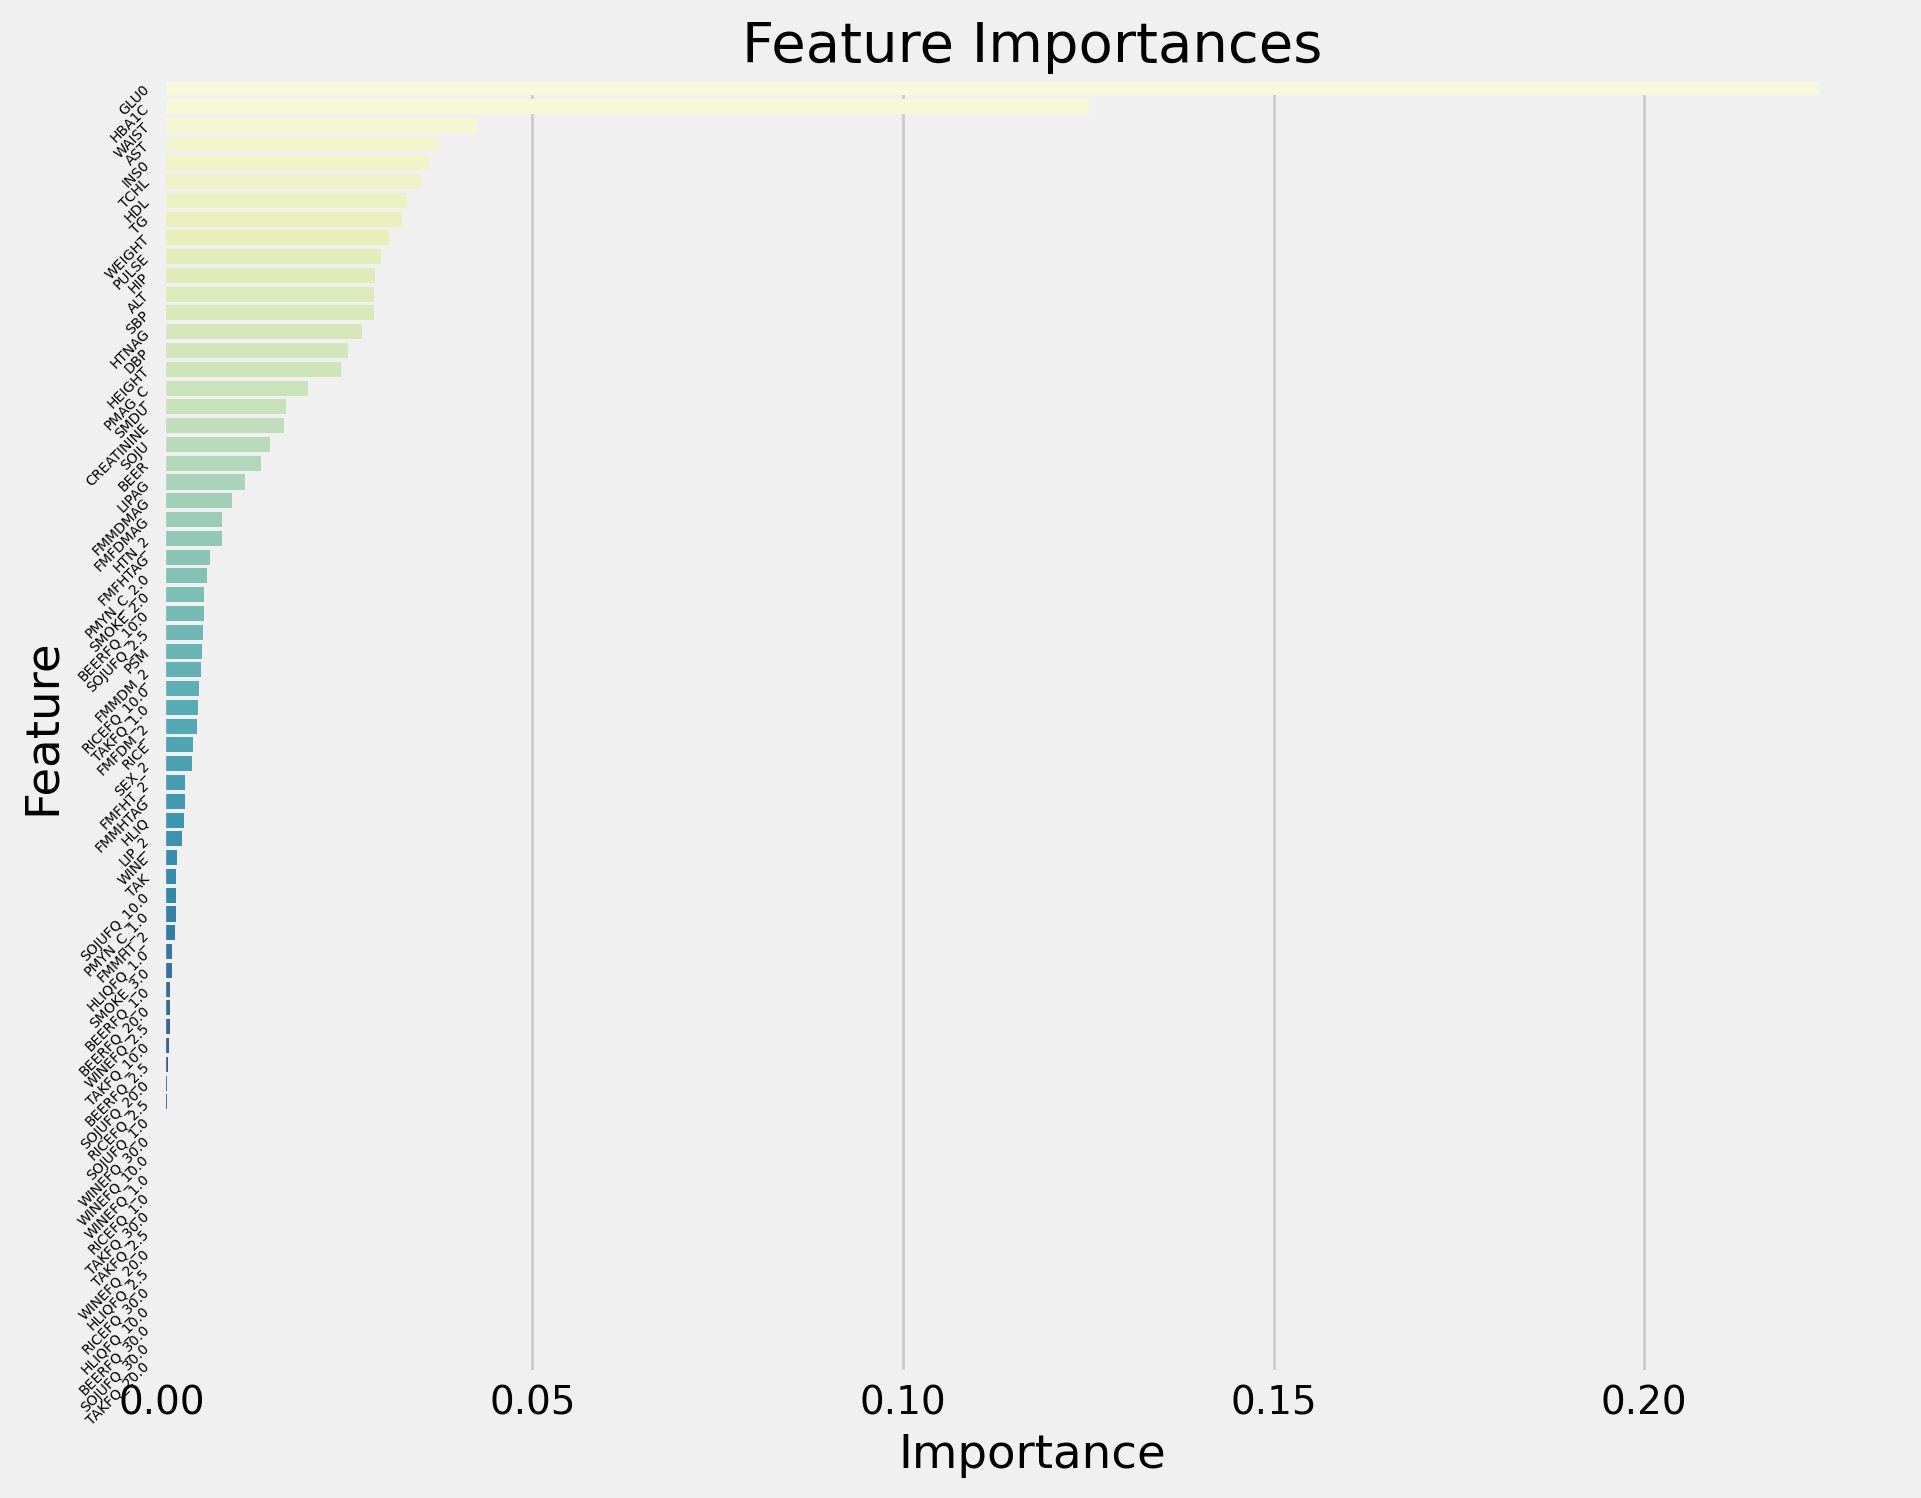

In [ ]:
# 특징 중요도 추출
feature_importances = model.feature_importances_
features = X_train.columns

# 중요도 시각화
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순서로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='YlGnBu')
plt.title('Feature Importances')
plt.yticks(fontsize=5)  # y축 레이블의 폰트 크기를 줄임
plt.yticks(rotation=45)
plt.show()

# 예측

In [ ]:
R2.head(3)

,T00_ID,T00_DATA_CLASS,T02_EDATE,T02_AGE,T02_MARRY,T02_DRINK,T02_TAKFQ,T02_TAKAM,T02_RICEFQ,T02_RICEAM,...,T02_DBP,T02_HBA1C,T02_GLU0,T02_CREATININE,T02_AST,T02_ALT,T02_TCHL,T02_HDL,T02_TG,T02_INS0
0,K_FOLLOW_0001,F05,200609,58,66666,2,0,77777.0,0,77777.0,...,70,99999.0,90,99999.0,17,14,202,40,118,4.2
1,K_FOLLOW_0002,F19,200510,41,2,3,0,77777.0,0,77777.0,...,86,6.4,99999,1.1,91,123,200,42,180,99999.0
2,K_FOLLOW_0003,F05,200505,54,66666,3,0,77777.0,0,77777.0,...,92,99999.0,90,1.2,33,38,141,31,93,11.1


In [ ]:
# 행열 개수 확인
print(R1.shape)

(1000, 64)


In [ ]:
# 66666,99999는 결측치와 같음. 이 둘은 null값으로 변환, 77777은 0과 같음. 이는 0으로 변환
R2.replace(66666,np.nan,inplace=True)
R2.replace(99999,np.nan,inplace=True)
R2.replace(77777,0,inplace=True)
R2.head()

,T00_ID,T00_DATA_CLASS,T02_EDATE,T02_AGE,T02_MARRY,T02_DRINK,T02_TAKFQ,T02_TAKAM,T02_RICEFQ,T02_RICEAM,...,T02_DBP,T02_HBA1C,T02_GLU0,T02_CREATININE,T02_AST,T02_ALT,T02_TCHL,T02_HDL,T02_TG,T02_INS0
0,K_FOLLOW_0001,F05,200609,58,NaN,2.0,0.0,0.0,0.0,0.0,...,70.0,NaN,90.0,NaN,17.0,14.0,202.0,40.0,118.0,4.2
1,K_FOLLOW_0002,F19,200510,41,2.0,3.0,0.0,0.0,0.0,0.0,...,86.0,6.4,NaN,1.1,91.0,123.0,200.0,42.0,180.0,NaN
2,K_FOLLOW_0003,F05,200505,54,NaN,3.0,0.0,0.0,0.0,0.0,...,92.0,NaN,90.0,1.2,33.0,38.0,141.0,31.0,93.0,11.1
3,K_FOLLOW_0004,F05,200704,62,NaN,1.0,0.0,0.0,0.0,0.0,...,88.0,NaN,106.0,0.7,20.0,17.0,194.0,53.0,109.0,18.8
4,K_FOLLOW_0005,F19,200601,51,2.0,3.0,0.0,0.0,0.0,0.0,...,79.0,NaN,124.0,1.1,25.0,12.0,148.0,43.0,155.0,NaN


In [ ]:
# 1차적으로 의미없는 개인식별 번호, 설문날짜, 진단나이 제거
R2_1=R2.drop(columns=['T00_ID','T00_DATA_CLASS','T02_EDATE','T02_MARRY','T02_DMAG'])

In [ ]:
# 'T02_' 전부 제거
R2_1.columns = R2_1.columns.str.replace('T02_', '', regex=False)

In [ ]:
# 술과 관련된 칼럼들만 모았음
R2_DRINK=R2_1[['DRINK','TAKFQ','TAKAM','RICEFQ','RICEAM','WINEFQ','WINEAM','SOJUFQ','SOJUAM','BEERFQ','BEERAM','HLIQFQ','HLIQAM']]

# 흡연과 관련된 칼럼만 모았음
R2_SMOKE=R2_1[['SMOKE','SMDU','PSM']]

# 고혈압과 관련된 칼럼만 모았음
R2_HTN=R2_1[['HTN','HTNAG']]

# 고지혈증과 관련된 칼럼만 모았음
R2_LIP=R2_1[['LIP','LIPAG']]

# 가족력과 관련된 칼럼만 모았음
R2_FAM=R2_1[['FMFHT','FMFHTAG','FMMHT','FMMHTAG','FMFDM','FMFDMAG','FMMDM','FMMDMAG']]

# 신체정보와 관련된 칼럼만 모았음 'SEX' 없음
R2_BODY=R2_1[['PMYN_C','PMAG_C','HEIGHT','WEIGHT','WAIST','PULSE','HIP','SBP','DBP','HBA1C','GLU0','CREATININE','AST','ALT','TCHL','HDL','TG','INS0']]

In [ ]:
# 결측치 확인
print(R2_DRINK.isnull().sum())

DRINK     3
TAKFQ     4
TAKAM     4
RICEFQ    4
RICEAM    4
WINEFQ    4
WINEAM    4
SOJUFQ    5
SOJUAM    5
BEERFQ    4
BEERAM    4
HLIQFQ    4
HLIQAM    4
dtype: int64


In [ ]:
# 음주빈도가 모두 0이면 DRINK 결측치:1, 그렇지 않으면 DRINK 결측치:3으로 처리함
# 음주 빈도 칼럼들의 합계를 계산
drink_sum = (R2_DRINK['TAKFQ'].fillna(0) + R2_DRINK['RICEFQ'].fillna(0) +
             R2_DRINK['WINEFQ'].fillna(0) + R2_DRINK['SOJUFQ'].fillna(0) +
             R2_DRINK['BEERFQ'].fillna(0) + R2_DRINK['HLIQFQ'].fillna(0))

# 조건에 따라 DRINK 칼럼의 결측치 채우기
R2_DRINK['DRINK'] = np.where(drink_sum == 0,
                               R2_DRINK['DRINK'].fillna(1),  # 음주 빈도가 모두 0일 경우 결측치에 1 채움
                               R2_DRINK['DRINK'].fillna(3))  # 음주 빈도가 0이 아닐 경우 결측치에 3 채움
R2_DRINK['DRINK'].value_counts()

<ipython-input-1584-65fce31c8aab>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count
DRINK,
3.0,477
1.0,473
2.0,35


In [ ]:
# TAKFQ는 0이 압도적으로 많기에 결측치 0으로 처리
R2_DRINK['TAKFQ']=R2_DRINK['TAKFQ'].fillna(0)
R2_DRINK['TAKFQ'].value_counts()

# TAKFG가 0이면 TAKAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_takam_excluding_zeros2 = R2_DRINK[R2_DRINK['TAKAM'] != 0]['TAKAM'].mean()
R2_DRINK.loc[R2_DRINK['TAKFQ'] == 0, 'TAKAM'] = 0
R2_DRINK['TAKAM'].fillna(round(mean_takam_excluding_zeros2,1), inplace=True)
round(mean_takam_excluding_zeros2,1)

<ipython-input-1585-f39cc9a79502>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1585-f39cc9a79502>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2.9

In [ ]:
# 0으로 RICEFQ 결측치 처리
R2_DRINK['RICEFQ']=R2_DRINK['RICEFQ'].fillna(0)

# RICEFG가 0이면 RICEAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_riceam_excluding_zeros2 = R2_DRINK[R2_DRINK['RICEAM'] != 0]['RICEAM'].mean()
R2_DRINK.loc[R2_DRINK['RICEFQ'] == 0, 'RICEAM'] = 0
R2_DRINK['RICEAM'].fillna(round(mean_riceam_excluding_zeros2,1), inplace=True)
round(mean_riceam_excluding_zeros2,1)

<ipython-input-1586-f85001f46c61>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1586-f85001f46c61>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4.1

In [ ]:
# 0으로 WINEFQ 결측치 처리
R2_DRINK['WINEFQ']=R2_DRINK['WINEFQ'].fillna(0)
R2_DRINK['WINEFQ'].value_counts()

# WINEFG가 0이면 WINEAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_wineam_excluding_zeros2 = R2_DRINK[R2_DRINK['WINEAM'] != 0]['WINEAM'].mean()
R2_DRINK.loc[R2_DRINK['WINEFQ'] == 0, 'WINEAM'] = 0
R2_DRINK['WINEAM'].fillna(round(mean_wineam_excluding_zeros2,1), inplace=True)
round(mean_wineam_excluding_zeros2,1)

<ipython-input-1587-285a6cf213fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1587-285a6cf213fc>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1.6

In [ ]:
# 0으로 SOJUFQ 결측치 처리
R2_DRINK['SOJUFQ']=R2_DRINK['SOJUFQ'].fillna(0)

# SOJUFG가 0이면 SOJUAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_sojuam_excluding_zeros2 = R2_DRINK[R2_DRINK['SOJUAM'] != 0]['SOJUAM'].mean()
R2_DRINK.loc[R2_DRINK['SOJUFQ'] == 0, 'SOJUAM'] = 0
R2_DRINK['SOJUAM'].fillna(round(mean_sojuam_excluding_zeros2,1), inplace=True)
round(mean_sojuam_excluding_zeros2,1)

<ipython-input-1588-5062cf39e400>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1588-5062cf39e400>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5.7

In [ ]:
# 0으로 BEERFQ 결측치 처리
R2_DRINK['BEERFQ']=R2_DRINK['BEERFQ'].fillna(0)

# BEERFG가 0이면 BEERAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_beeram_excluding_zeros2 = R2_DRINK[R2_DRINK['BEERAM'] != 0]['BEERAM'].mean()
R2_DRINK.loc[R2_DRINK['BEERFQ'] == 0, 'BEERAM'] = 0
R2_DRINK['BEERAM'].fillna(round(mean_beeram_excluding_zeros2,1), inplace=True)
round(mean_beeram_excluding_zeros2,1)

<ipython-input-1589-e33d21767c74>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1589-e33d21767c74>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3.8

In [ ]:
# 0으로 HLIQFQ 결측치 처리
R2_DRINK['HLIQFQ']=R2_DRINK['HLIQFQ'].fillna(0)

# HLIQFG가 0이면 HLIQAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_hliqam_excluding_zeros2 = R2_DRINK[R2_DRINK['HLIQAM'] != 0]['HLIQAM'].mean()
R2_DRINK.loc[R2_DRINK['HLIQFQ'] == 0, 'HLIQAM'] = 0
R2_DRINK['HLIQAM'].fillna(round(mean_hliqam_excluding_zeros2,1), inplace=True)
round(mean_hliqam_excluding_zeros2,1)

<ipython-input-1590-5d6c2e1b5d0c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1590-5d6c2e1b5d0c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5.9

In [ ]:
# 빈도 범주가 일정하지 않음. 모든 값을 월 횟수로 변환

for column in ['TAKFQ','RICEFQ','WINEFQ','SOJUFQ','BEERFQ','HLIQFQ']:
    R1_DRINK[column] = R1_DRINK[column].replace(2.0, 2.5)
    R1_DRINK[column] = R1_DRINK[column].replace(3.0, 4)
    R1_DRINK[column] = R1_DRINK[column].replace(4.0, 10)
    R1_DRINK[column] = R1_DRINK[column].replace(5.0, 20)
    R1_DRINK[column] = R1_DRINK[column].replace(6.0, 30)

In [ ]:
# FQ*AM 칼럼 생성

R2_DRINK['TAK'] = R2_DRINK['TAKFQ'] * R2_DRINK['TAKAM']
R2_DRINK['RICE'] = R2_DRINK['RICEFQ'] * R2_DRINK['RICEAM']
R2_DRINK['WINE'] = R2_DRINK['WINEFQ'] * R2_DRINK['WINEAM']
R2_DRINK['SOJU'] = R2_DRINK['SOJUFQ'] * R2_DRINK['SOJUAM']
R2_DRINK['BEER'] = R2_DRINK['BEERFQ'] * R2_DRINK['BEERAM']
R2_DRINK['HLIQ'] = R2_DRINK['HLIQFQ'] * R2_DRINK['HLIQAM']
R2_DRINK=R2_DRINK[['TAK','TAKFQ','RICE','RICEFQ','WINE','WINEFQ','SOJU','SOJUFQ','BEER','BEERFQ','HLIQ','HLIQFQ']]

<ipython-input-1592-7b70568bc486>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1592-7b70568bc486>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1592-7b70568bc486>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1592

In [ ]:
print(R2_SMOKE.isnull().sum())

SMOKE    2
SMDU     3
PSM      7
dtype: int64


In [ ]:
# SMOKE는 1이 압도적으로 많기에 결측치 1으로 처리
R2_SMOKE['SMOKE']=R2_SMOKE['SMOKE'].fillna(1)

# SMOKE가 1이면 SMDU 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_SMDU_excluding_zeros2 = R2_SMOKE[R2_SMOKE['SMOKE'] != 1]['SMDU'].mean()
R2_SMOKE.loc[R2_SMOKE['SMOKE'] == 0, 'SMDU'] = 0
R2_SMOKE['SMDU'].fillna(round(mean_SMDU_excluding_zeros2,1), inplace=True)
round(mean_SMDU_excluding_zeros2,1)

# PSM 1로 처리
R2_SMOKE['PSM']=R2_SMOKE['PSM'].fillna(1)



<ipython-input-1594-ca49c711c56c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1594-ca49c711c56c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1594-ca49c711c56c>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 결측치 확인
print(R2_HTN.isnull().sum())

HTN      2
HTNAG    4
dtype: int64


In [ ]:
# HTN은 0으로 결측치 처리
R2_HTN['HTN']=R2_HTN['HTN'].fillna(0)

# HTN이 1이면 HTNAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_htnag_excluding_zeros2 = R2_HTN[R2_HTN['HTN'] != 1]['HTNAG'].mean()
R2_HTN.loc[R2_HTN['HTN'] == 0, 'HTNAG'] = 0
R2_HTN['HTNAG'].fillna(round(mean_htnag_excluding_zeros2,1), inplace=True)
round(mean_htnag_excluding_zeros2,1)

<ipython-input-1596-fdbc2f959583>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1596-fdbc2f959583>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



54.2

In [ ]:
# 결측치 확인
print(R2_LIP.isnull().sum())

LIP      2
LIPAG    3
dtype: int64


In [ ]:
# LIP은 0으로 결측치 처리
R2_LIP['LIP']=R2_LIP['LIP'].fillna(0)

# LIP이 1이면 LIPAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_lip_excluding_zeros2 = R2_LIP[R2_LIP['LIP'] != 1]['LIPAG'].mean()
R2_LIP.loc[R2_LIP['LIP'] == 0, 'LIPAG'] = 0
R2_LIP['LIPAG'].fillna(round(mean_lip_excluding_zeros2,1), inplace=True)
round(mean_lip_excluding_zeros2,1)

<ipython-input-1598-ee94ffc479f0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1598-ee94ffc479f0>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



58.0

In [ ]:
# 결측치 확인
print(R2_FAM.isnull().sum())

FMFHT      0
FMFHTAG    0
FMMHT      0
FMMHTAG    1
FMFDM      0
FMFDMAG    0
FMMDM      0
FMMDMAG    1
dtype: int64


In [ ]:
# FMMHT가 1이면 FMMHTAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_fmmht_excluding_zeros2 = R2_FAM[R2_FAM['FMMHT'] != 1]['FMMHTAG'].mean()
R2_FAM.loc[R2_FAM['FMMHT'] == 0, 'FMMHTAG'] = 0
R2_FAM['FMMHTAG'].fillna(round(mean_fmmht_excluding_zeros2,1), inplace=True)
round(mean_fmmht_excluding_zeros2,1)

# FMMDM이 1이면 FMMDMAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_fmmdm_excluding_zeros2 = R2_FAM[R2_FAM['FMMDM'] != 1]['FMMDMAG'].mean()
R2_FAM.loc[R2_FAM['FMMDM'] == 0, 'FMMDMAG'] = 0
R2_FAM['FMMDMAG'].fillna(round(mean_fmmdm_excluding_zeros2,1), inplace=True)
round(mean_fmmdm_excluding_zeros2,1)

<ipython-input-1600-2f355eaf65c0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1600-2f355eaf65c0>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



64.6

In [ ]:
# 결측치 확인
print(R2_BODY.isnull().sum())

PMYN_C          4
PMAG_C         35
HEIGHT          1
WEIGHT          1
WAIST           2
PULSE          11
HIP             2
SBP             1
DBP             1
HBA1C         910
GLU0           46
CREATININE    189
AST             2
ALT             2
TCHL            2
HDL             2
TG              2
INS0          394
dtype: int64


In [ ]:
R2_BODY['PMYN_C'].value_counts()

,count
PMYN_C,
0.0,432
2.0,416
1.0,133


In [ ]:
# PMYN_C는 결측치 0으로 처리
R2_BODY['PMYN_C']=R2_BODY['PMYN_C'].fillna(0)

# PMYN_C가 2가 아니면, PMAG_C 결측치 0, 2이면 0을 제외한 PMAG_C의 평균으로 처리
mean_pmag_excluding_zeros2 = R2_BODY[R2_BODY['PMYN_C'] == 2]['PMAG_C'].mean()
R2_BODY.loc[R2_BODY['PMYN_C'] != 2, 'PMAG_C'] = 0
R2_BODY['PMAG_C'].fillna(round(mean_pmag_excluding_zeros2,1), inplace=True)
round(mean_pmag_excluding_zeros2,1)

# 나머지 결측치는 전부 평균으로 처리
R2_BODY['WAIST'].fillna(round(R2_BODY['WAIST'].mean(),1), inplace=True)
R2_BODY['PULSE'].fillna(round(R2_BODY['PULSE'].mean(),1), inplace=True)
R2_BODY['HIP'].fillna(round(R2_BODY['HIP'].mean(),1), inplace=True)
R2_BODY['HBA1C'].fillna(round(R2_BODY['HBA1C'].mean(),1), inplace=True)
R2_BODY['GLU0'].fillna(round(R2_BODY['GLU0'].mean(),1), inplace=True)
R2_BODY['CREATININE'].fillna(round(R2_BODY['CREATININE'].mean(),1), inplace=True)
R2_BODY['TG'].fillna(round(R2_BODY['TG'].mean(),1), inplace=True)
R2_BODY['INS0'].fillna(round(R2_BODY['INS0'].mean(),1), inplace=True)
R2_BODY['HEIGHT'].fillna(round(R2_BODY['HEIGHT'].mean(),1), inplace=True)
R2_BODY['WEIGHT'].fillna(round(R2_BODY['WEIGHT'].mean(),1), inplace=True)
R2_BODY['SBP'].fillna(round(R2_BODY['SBP'].mean(),1), inplace=True)
R2_BODY['DBP'].fillna(round(R2_BODY['DBP'].mean(),1), inplace=True)
R2_BODY['AST'].fillna(round(R2_BODY['AST'].mean(),1), inplace=True)
R2_BODY['ALT'].fillna(round(R2_BODY['ALT'].mean(),1), inplace=True)
R2_BODY['TCHL'].fillna(round(R2_BODY['TCHL'].mean(),1), inplace=True)
R2_BODY['HDL'].fillna(round(R2_BODY['HDL'].mean(),1), inplace=True)

<ipython-input-1603-468758963cb9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1603-468758963cb9>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1603-468758963cb9>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1603-468758963cb9>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

S

In [ ]:
# SEX 삽입, PMYN_C (폐경)이 0이면 남성(1), 1 혹은 2이면 여성(2)
R2_BODY['SEX'] = R2_BODY['PMYN_C'].apply(lambda x: 1 if x == 0 else 2)
R2_BODY['SEX'].value_counts()

<ipython-input-1604-7c9c32414e21>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count
SEX,
2,549
1,436


In [ ]:
R2_1['DM'].isnull().sum()

2

In [ ]:
R2_1['DM'].fillna(1, inplace=True)
R2_1['DM'].value_counts()

,count
DM,
1.0,958
2.0,27


In [ ]:
TEST=pd.concat([R2_DRINK,R2_SMOKE,R2_HTN,R2_LIP,R2_FAM,R2_BODY],axis=1)
TEST.head()

,TAK,TAKFQ,RICE,RICEFQ,WINE,WINEFQ,SOJU,SOJUFQ,BEER,BEERFQ,...,HBA1C,GLU0,CREATININE,AST,ALT,TCHL,HDL,TG,INS0,SEX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.4,90.0,0.9,17.0,14.0,202.0,40.0,118.0,4.2,1
1,0.0,0.0,0.0,0.0,0.0,0.0,105.0,5.0,0.0,0.0,...,6.4,94.8,1.1,91.0,123.0,200.0,42.0,180.0,8.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,...,6.4,90.0,1.2,33.0,38.0,141.0,31.0,93.0,11.1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.4,106.0,0.7,20.0,17.0,194.0,53.0,109.0,18.8,2
4,0.0,0.0,0.0,0.0,0.0,0.0,21.0,3.0,0.0,0.0,...,6.4,124.0,1.1,25.0,12.0,148.0,43.0,155.0,8.0,1


In [ ]:
# 스케일러 초기화
scaler = MinMaxScaler()

# 훈련 데이터와 테스트 데이터를 스케일링
TEST_scaled = TEST.copy()

# 연속형 변수만 스케일링
TEST_scaled[['TAK','RICE','SOJU','BEER','HLIQ','SMDU','PSM','HTNAG','LIPAG','FMFHTAG','FMMHTAG','FMFDMAG','FMMDMAG',
              'PMAG_C','HEIGHT','WEIGHT','WAIST','PULSE','HIP','SBP','DBP','HBA1C','GLU0','CREATININE',
              'AST','ALT','TCHL','HDL','TG','INS0']] = scaler.fit_transform(TEST_scaled[['TAK',
              'RICE','SOJU','BEER','HLIQ','SMDU','PSM','HTNAG','LIPAG','FMFHTAG','FMMHTAG','FMFDMAG','FMMDMAG',
              'PMAG_C','HEIGHT','WEIGHT','WAIST','PULSE','HIP','SBP','DBP','HBA1C','GLU0','CREATININE',
              'AST','ALT','TCHL','HDL','TG','INS0']])
TEST_scaled.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning:

Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.



,TAK,TAKFQ,RICE,RICEFQ,WINE,WINEFQ,SOJU,SOJUFQ,BEER,BEERFQ,...,HBA1C,GLU0,CREATININE,AST,ALT,TCHL,HDL,TG,INS0,SEX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.301887,0.286585,0.200000,0.025641,0.037234,0.457547,0.192771,0.107448,0.033259,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.700000,5.0,0.0,0.0,...,0.301887,0.315854,0.333333,0.405128,0.617021,0.448113,0.216867,0.183150,0.075388,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.046667,1.0,0.0,0.0,...,0.301887,0.286585,0.400000,0.107692,0.164894,0.169811,0.084337,0.076923,0.109756,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.301887,0.384146,0.066667,0.041026,0.053191,0.419811,0.349398,0.096459,0.195122,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.140000,3.0,0.0,0.0,...,0.301887,0.493902,0.333333,0.066667,0.026596,0.202830,0.228916,0.152625,0.075388,1


In [ ]:
# 범주형 변수를 원-핫 인코딩
TEST_processed = pd.get_dummies(TEST_scaled, columns=['TAKFQ','RICEFQ','WINEFQ','SOJUFQ','BEERFQ','HLIQFQ',
                                                          'SMOKE','HTN','LIP','FMFHT','FMMHT','FMFDM','FMMDM','SEX','PMYN_C'], drop_first=True)
import missingno as msno
from sklearn.pipeline import make_pipeline
import plotly.graph_objs as go
import plotly.offline as pyTEST_processed

In [ ]:
TEST = TEST.reindex(columns=X_train.columns, fill_value=0)

# 2. 모델을 사용하여 예측
y_pred_test = model.predict(TEST)

# 3. 예측 결과를 test 데이터프레임에 추가
TEST['DM'] = y_pred_test

# 예측된 survived 값을 확인
print(TEST[['DM']])

     DM
0     1
1     1
2     1
3     1
4     1
..   ..
980   1
981   1
982   1
983   1
984   1

[985 rows x 1 columns]


In [ ]:
TEST['DM'].value_counts()

,count
DM,
1,981
2,4


In [ ]:
R2_1['DM'].value_counts()

,count
DM,
1.0,958
2.0,27
